In [1]:
# !pip install --upgrade covsirphy

In [2]:
# These are the modules that are installed as of now we will install more later

# !pip freeze

### Business Understanding

1. This model will help user simulate SIR Model in their specific country
2. This is just a simple SIR model. It doesn't take into effect all the measures taken by a government.

### SIR Model

 The SIR epidemic model is a simple mathematical description of the spread of disease in a population. It divides the population into 3 compartments which may vary as a fucntion of time t, and space x:
 
 S(t) = are those who are susceptible but not infected yet.
 I(t) = are those who are infected.
 R(t) = are those who have recovered from the disease and now have immunity to it.
 
 The SIR model describes the changes in the population of each of three compartments using &beta; and &gamma;. &beta; describes the effective contact rate of the disease. &gamma; describes the mean recovery rate. An infected individual comes into contact with &beta;N other individuals per unit time (of which the fraction that are a susceptible to contracting the disease of S/N). 1/&gamma; is the mean period of time during which an infected individual can pass it on.
 
 
 
 The differential equations describing this model were first derived by Kermack and McKendrick:
 
 dS/dT = &beta;SI/N </br>
 dI/dT = &beta;SI/N - &gamma;I  </br>
 dR/dT = &gamma;I </br>
 
 N = S+I+R is the total population, T is the elapsed time from the start date.

### SIR model Implementation

We'll use differential equations to calculate the population change over time.

Preparing data for the model¶
We'll start by taking only the canadian population as our data frame.

Effective contact rate is transmission rate * contact rate, so:

5% transmission rate and 5 contacts a day is 0.05*5 = 0.25
Recovery rate is 1/day

4 day recovery rate 1/4 = 0.25

R0 is 3.5
Total Population in india is : 1352617328


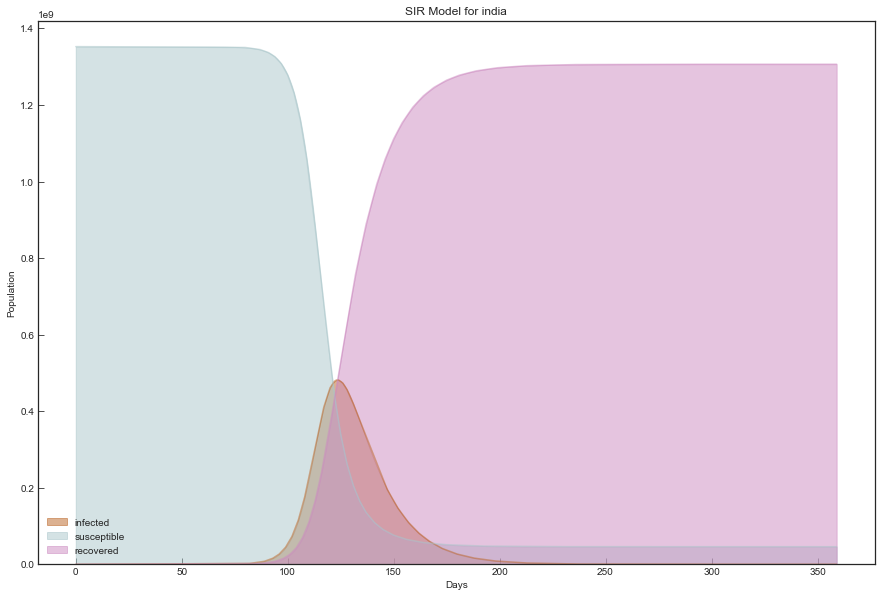

In [27]:
import covsirphy as cs
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib
from matplotlib.ticker import ScalarFormatter
import numpy as np
import pandas as pd
import scipy as sci
from scipy.integrate import odeint
import io




# The differentail equation to define SIR Model:

def deriv(state, t, N, beta, gamma):
    
    S, I, R = state
    
    #change in S population over time
    dsdt = -beta * S* I / N
    #change in I population over time
    dIdt = beta * S * I / N - gamma * I
    #change in R population over time
    dRdt = gamma * I
    
    return dsdt, dIdt, dRdt

def do_plot(country,effective_contact_rate, recovery_rate):
    
    data_loader = cs.DataLoader("input")
    jhu_data = data_loader.jhu()
    #Make use of dataloader to get population of Countries.
    population_data = data_loader.population()

    effective_contact_rate = float(effective_contact_rate)
    recovery_rate = float(recovery_rate)
    country = str(country)
#     print(effective_contact_rate,recovery_rate,country)

    #calculate R0
    print("R0 is", effective_contact_rate/recovery_rate)
    total_population = population_data.value(country, province = None)
    print("Total Population in "+ country + " is :",total_population)
    recovered = 0
    infected = 1
    susceptible = total_population - infected - recovered

    # number of days
    # days = len(jhu_data.subset("Canada", province=None))
    days = range(0,360)

    #use of differentail equation

    ret = odeint(deriv,
                [susceptible, infected, recovered],
                days,
                args = (total_population, effective_contact_rate, recovery_rate))

    S, I , R = ret.T

    #Build a dataframe

    df = pd.DataFrame({
        'susceptible': S,
        'infected': I,
        'recovered': R,
        'day': days
    })
    
    
    

    

    fig = df.plot(x='day',
            y=['infected', 'susceptible', 'recovered'],
            color=['#bb6424', '#aac6ca', '#cc8ac0'],
            kind='area',
            title = "SIR Model for " + country,
            xlabel='Days',
            ylabel='Population',
            figsize=(15,10),
            stacked=False)
    
    

    
    
    bytes_image = io.BytesIO()
    plt.savefig(bytes_image,format='png')
    bytes_image.seek(0)
    return bytes_image
    
    
    
    
    

do_plot("india",0.25,1/14)

In [4]:
bytes_image

NameError: name 'bytes_image' is not defined

In [14]:
df = pd.read_excel('./input/population_data.xlsx')
df.head()

,country,population
0,China,1440297825
1,India,1382345085
2,United States,331341050
3,Indonesia,274021604
4,Pakistan,221612785


In [17]:
df['country']==

38    37799407
Name: population, dtype: int64

,country,population,Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,China,1440297825,0.39 %,5540090,153,9388211,-348399.0,1.7,38,61 %,18.47 %
1,India,1382345085,0.99 %,13586631,464,2973190,-532687.0,2.2,28,35 %,17.70 %
2,United States,331341050,0.59 %,1937734,36,9147420,954806.0,1.8,38,83 %,4.25 %
3,Indonesia,274021604,1.07 %,2898047,151,1811570,-98955.0,2.3,30,56 %,3.51 %
4,Pakistan,221612785,2.00 %,4327022,287,770880,-233379.0,3.6,23,35 %,2.83 %
